# 목차 

 1. 데이터 탐색 
 
 2. 가설 설정
 
 3. 탐색적 자료 분석
 
 4. 데이터 전처리 작업 
    
 5. 한계점



In [3]:
# -*- coding: utf-8 -*-
# 인코딩 tsv 파일을 csv 로 불러오기

import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태 가져오기
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

In [4]:
# 또는 내 컴퓨터의 치폴리 엑셀 데이터로 불러오기 # 단 tsv 파일을 xlsx 로 변환하는 사전작업을 실시함.
import pandas as pd

chipo=pd.read_excel('C:/datapy/chipotle.xlsx',sheet_name=0)


# 1. 데이터 탐색

  ## 수치형 데이터의 타입인 int64
  ## 범주형 데이터 타입인 object

In [28]:
# 실행 결과 값을 통해 index는 0부터 4621까지 총 4,622개의 행과 Data columns는 'order_id', 'quantity', 'item_name', 
#'choice_description', item_price 5개의 컬럼으로 이루어져있는것을 알 수 있습니다. 
#5개의 컬럼 중 2개는 int 타입 3개는 object 타입으로 구성되어있는것을 알 수 있습니다.
print(chipo.shape)
print('-----------------------')
print(chipo.info())

(4622, 5)
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB
None


# 데이터를 살펴 볼 때 가장 기본적으로 변수의 특성을 
# 살펴보기위해 head 코드를 이용하여 변수를 확인해준다.

 * 주문번호, quntity, 음식이름, 사이드메뉴, 음식가격

In [29]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [30]:
#행, 열 데이터 확인하기

#column과 index를 확인.
print(chipo.columns)
print('-'*100)
print(chipo.index)

#실행 결과를 통해 columns 명과 data type, index의 범위와 step을 알 수 있습니다.

#여기서 quantity와 item_price는 연속형 피처입니다. 


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
----------------------------------------------------------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


# 기초통계량 계산 
* 총개수, 평균, 표준편차, 최소, 1사분위수, 중위수, 3사분위수, 최대값

In [31]:
#describe() 함수를 이용하여 기초 통계량 출력하기

chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe())

          quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000


In [32]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [33]:
# unique() 함수를 이용하여 개수 파악하기
print(len(chipo['order_id'].unique())) #order_id의 개수를 출력
print(len(chipo['item_name'].unique())) #item_name의 개수를 출력

1834
50


In [34]:
# 주문량 많은 음식의 상위 5개 

#item_name의 value_counts를 높은숫자부터 상위 5개 코드

item_count = chipo['item_name'].value_counts()[0:5]
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301


# 2. 가설설정 

* 보통 가설 설정 후 탐색적 자료분석을 실시한다. 
* 기본적인 가설은 보통 각 집단에 따른 차이.
* 예를 들면 성별에 따라 주문한 음식에 차이가 있을 것이다. (카이스퀘어 검정)
* 연령에 따라 주문한 음식에 차이가 있을 것이다.
* 주문개수에 따라 지불가격이 양의상관관계를 가질것이다.(상관분석)



* 궁극적으로 가설을 설정하는 이유는 이 데이터를 가지고 내가 분석하고자하는 목표 (가치) 를 찾기 위해서 설정하고
* 가설 설정이 없는 데이터 분석은 큰 의미없는 데이터 분석으로 생각됩니다.
* 본 데이터는 가설 설정을 할 수 있는 데이터가 아니라는 단점이 있어 한정적인 분석을 실시했습니다.

* 기업/기관 등에서 가설을 만들어 그 가설을 입증하는 데이터 분석을 실시하여 모형을 만들고 평가 하는 분석을 실시할 수 있다.
* 대표적인 예시로 타이타닉 자료

# 상관분석 실시 


*피어슨의 상관계수는 일반적으로,

  값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계

  값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계

  값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계

  값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계

  값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계

  값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계

  값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계
 
 로 해석됩니다.




In [35]:
# 주문개수와 지불가격에 대한 상관관계슨 26% 정도의 약한 상관관계를 가진다고 볼 수 있다.

corr = chipo.corr(method = 'pearson')
corr

,quantity,item_price
quantity,1.000000,0.263981
item_price,0.263981,1.000000


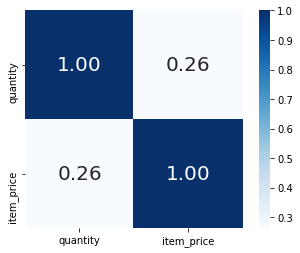

In [36]:
# 히트맵 이미지 , 상관분석을 시각화하여 쉽게 볼 수 있는 방법
#

import matplotlib.pyplot as plt 
import seaborn as sns

df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')


# 만약 여기서 분류분석을 한다면

# 상위 5개 음식을 선택한 집단의 특성을 분류  clustering (군집분석)


군집분석이란?
군집분석(cluster analysis 또는 집락분석)은 다변량자료를 각 특성의 유사성에 따라 여러 그룹(군집 또는 집락)으로 나누는 통계적 분석기법이다. 즉 각 개체나 변수가 미리 정해진 기준에 맞추어 각 군집 내에 비슷한 것들끼리 모이도록 분류하는 것이다.
판별분석에 따른 분류(classification)와 다른 점은 분류는 이미 알려진 그룹의 구조와 수대로 나누어 각 그룹에 새로운 개체를 할당하는 것이 목적이지만, 군집분석은 그룹의 수나 구조가 가정되어 있지 않고 유사성(similarity) 또는 근접성(proximity)에 근거한 그룹화(grouping)이다.
성공적으로 그룹화가 되었다면 그래픽으로 표현하였을 때, 다른 군집의 개체들은 서로 멀리 떨어져 있을 것이다. 2차원 또는 3차원의 산점도를 통해 직접적인 그룹화도 가능하기 때문에 최근에는 고차원의 관측값들을 2차원의 산점도로 표현하려는 그래픽 기법도 많이 연구되고 있다.
군집분석은 여러 상황에서 매우 유용한 자료분석도구이다. 예를 들어 조사자가 응답자에게 어떤 자료를 얻었을 때, 그 중에는 쓸모 없는 자료들(장난스런 답변 등)도 많이 있게 된다. 이러한 쓸모 없고 무성의한 설문 자료의 군집을 제거하여 유용한 자료들만으로 축소할 수 있다. 다른 예로 자료의 속성에 관한 가설을 검정하고자 할 때도 유용하게 사용된다. 예를 들어 조사자가 주류 소비자들을 각각 맥주와 소주를 좋아하는 그룹으로 나눌 수 있다고 생각할 때, 소비자들을 음주 취향에 따라 그룹화하여 과연 두 그룹으로 분류가 되는가를 확인해 볼 수 있다. 만약 분류가 잘된다면 음주취향이 어떤 차이를 보인다고 판단할 수 있다.

In [37]:
#아이템별 주문 개수와 총량

#groupby() 함수를 이용하여 아이템별 주문 개수와 총량을 구하기

#groupby() 함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며 이를 통해 그룹별 연산을 적용 가능

#아이템별 주문개수 출력하는 코드
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:5]

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: order_id, dtype: int64

In [38]:
#아이템별 주문 총량 계산하는 함수
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[0:5]

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64

# 3. 탐색적 자료 분석

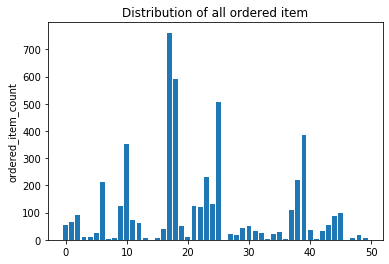

In [39]:
#시각화로 분석 결과 살펴보기

#tolist()와 Numpy를 활용하여 x_pos를 선언하고 0부터 50까지의 숫자를 그래프의 x축으로 사용
#y축에는 주문 총량에 해당하는 item_quantity.values.tolist()를 넣습니다.

import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align= 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

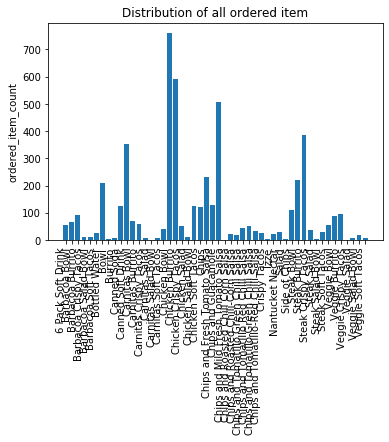

In [40]:
# 원래는 이와같은 형태이나 이름이 길어서 list를 수치로 변환시켜 위와같은 그림을 그림.

plt.xticks(rotation=90, ha='right')
plt.bar(item_name_list, order_cnt, align= 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [59]:
# 단어구름을 만들어주기 위한 폰트 불러오기
font_path = 'C:/Windows/Fonts/malgun.ttf'

ERROR: Invalid requirement: '#'


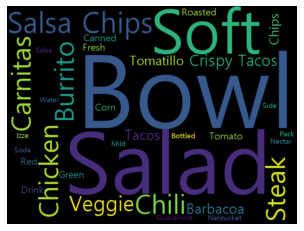

In [62]:
# 단어 구름 ( 빈도분석을 시각화 하는 기술)
# 일반적인 분석으로 보았을 때 눈에 들어오지 않기에 Word cloud 를 실시 

!pip install wordcloud                                    # 워드클라우드 패키지 설치

from wordcloud import WordCloud 

cloud = WordCloud(font_path=font_path, width=800, height=600).generate(" ".join(item_name_list))

plt.imshow(cloud, interpolation='bilinear') # 글자를 부드럽게

plt.axis('off')

plt.show()

# 4. 데이터 전처리

In [41]:
#데이터 전처리 : 전처리 함수 사용하기

#item_price 피처의 요약 통계를 구하기 위해 데이터 전처리를 합니다.

#전처리 전 지금 현재 상태를 확인

#float64 의 형태를 가지고 있음 (숫자+문자 라는 의미?)

print(chipo.info())
print('-'*100)
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB
None
----------------------------------------------------------------------------------------------------


0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [42]:
#가격의 앞에 붙은 $ 기호를 제거하기 위해 apply 함수와 lambda 함수를 이용하여 제거
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))


# 기초통계량 산출
chipo.describe()

TypeError: 'float' object is not subscriptable

In [23]:
# apply() 함수는 시리즈 단위 연산을 처리하는 기능을 수행하며, 
# sum()이나 mean()과 같이 연산이 정의된 함수를 파라미터로 받는다. 
# 따라서 첫 번째 문자열을 제거한 뒤 나머지 문자열을 수치형으로 바꿔주는 함수를 파라미터로 입력할 수도 있다.


In [43]:
#주문당 평균 계산금액 출력하기

#order_id 로 그룹을 생성한 뒤, item_price 피처에 sum() 함수를 적용하고 mean() 함수를 추가하여 평균 금액을 계산할 수 있다.

chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [44]:
#한 주문에 10달러 이상 지불한 주문 번호(id) 출력하기

#order_id 피처를 기준으로 그룹을 만들어 quantity, item_price 피처의 합계를 계산하고 결과값이 10 이상인 값을 필터링 합니다

chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [45]:
#각 아이템의 가격 구하기

#① chipo.quantity == 1으로 동일 아이템을 1개만 구매한 주문을 선별합니다.

#② item_name을 기준으로 groupby 연산을 수행한뒤, min() 함수로 각 그룹별 최저가를 계산합니다.

#③ item_price를 기준으로 내림차순으로 정렬하는 sort_values() 함수를 적용합니다.

chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = 'item_price', ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


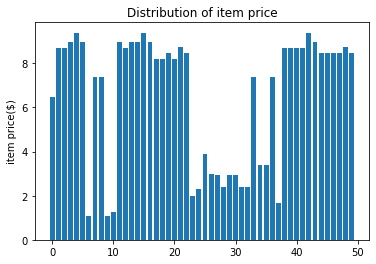

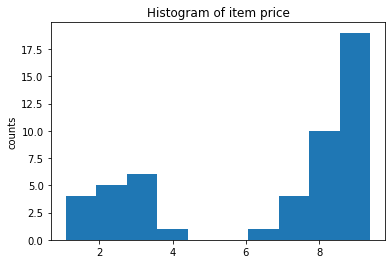

In [46]:
#각 아이템의 대략적인 가격을 2개의 그래프로 시각화하여 나타낼 수 있다.

#이를 통해 2~4달러, 혹은 6~8달러 정도에 아이템의 가격대가 형성되어 있음을 알 수 있다.

#아이템 가격 분포 그래프
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

#아이템 가격 히스토그램
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()


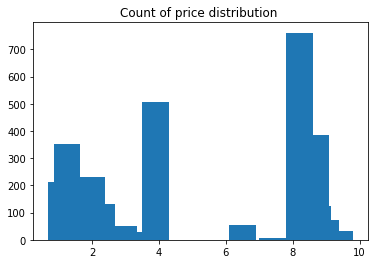

In [57]:
# tolist범위 주지 않고 가격의 분포  기초 통계 분석에 해당됨.

item_price1 = price_per_item['item_price']

plt.bar(item_price1, order_cnt, align= 'center')
plt.title('Count of price distribution ')
plt.show()



In [39]:
#가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기

#order_id에 그룹별 합계 연산을 적용하고 item_price를 기준으로 sort_values를 반환하면 가장 비싼 주문순으로 연산 결과를 얻을 수 있습니다.
chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [40]:
#'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기

#특정 아이템인 'Veggie Salad Bowl' 이 몇 번이나 주문 되었는지 알아보겠습니다.
#필터링을 이용하여 drop_duplicates() 함수를 사용합니다. 이는 한 주문내에서 item_name이 중복 집계된 경우를 제거해주기 위함입니다.

chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']

chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [41]:
#위에 사용했던 방법과 비슷한 방법으로 'Chicken Bowl'을 2개 이상 주문한 주문 횟수를 구합니다.

#'Chicken Bowl'을 주문한 데이터만을 필터링하고 주문 번호를 그룹으로 선정하여 sum() 함수를 적용한 결과에서 quantity를 선택하면 
#이 결과가 각 주문마다 'Chicken Bowl'을 주문한 횟수를 의미합니다.

chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

# 결론 및 한계점

## 데이터 주문자의 개인정보, 특성, 성별, 나이 등의 정보가 없음 

## 깊이 있는 분석을 할 수 있는 데이터가 아닌 기초적인 분석만 할 수 있는 데이터 셋이다.

## 하지만 본 데이터 분석을 통해 앞으로 어떤 방향성으로 분석을 진행할 수 있을지 감을 주는 좋은 과제로 생각된다.